In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
ds=pd.read_csv('pima_indian_diabetes.csv',header=0,names=range(0,8))

In [3]:
ds

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [4]:
df=pd.DataFrame(data=ds)
df

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [5]:
x=df.iloc[:,0:-1]
x

,0,1,2,3,4,5,6
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [6]:
y=df.iloc[:,-1]
y

1     0
8     1
1     0
0     1
5     0
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 767, dtype: int64

In [7]:
y.value_counts()

0    500
1    267
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

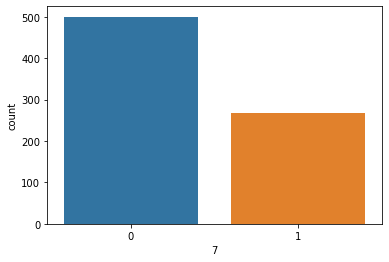

In [8]:
sns.countplot(y)

# Applying SMOTE

In [9]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import sklearn
sklearn.__version__

'1.2.2'

In [11]:
import numpy
numpy.__version__

'1.20.3'

In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.over_sampling import SMOTE


In [14]:
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)

In [15]:
train_x.value_counts()

0    1   2   3    4     5      6 
0    48  20  0    24.7  0.140  22    1
137  90  41  0    32.0  0.391  39    1
136  74  26  135  26.0  0.647  51    1
         50  204  37.4  0.399  24    1
     82  0   0    0.0   0.640  69    1
                                    ..
109  56  21  135  25.2  0.833  23    1
     58  18  116  28.5  0.219  22    1
     60  8   182  25.4  0.947  21    1
         27  0    25.0  0.206  27    1
199  76  43  0    42.9  1.394  22    1
Length: 1000, dtype: int64

In [16]:
train_y.value_counts()

0    500
1    500
Name: 7, dtype: int64

In [17]:
train_y

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: 7, Length: 1000, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

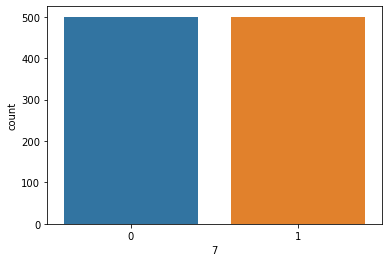

In [18]:
sns.countplot(train_y)

In [19]:
ds=pd.read_csv('iris.csv')

In [20]:
ds

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
ds['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

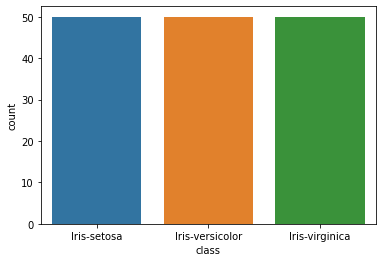

In [22]:
sns.countplot(ds['class'])

In [23]:
wineds=pd.read_csv('winequality-red.csv')

In [24]:
wineds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
wineds.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
615,9.6,0.6,0.5,2.3,0.079,28.0,71.0,0.9997,3.5,0.57,9.7,5


In [26]:
wineds['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

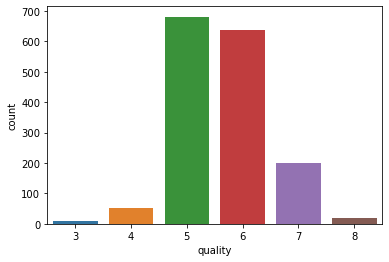

In [27]:
sns.countplot(wineds['quality'])

In [28]:
x=wineds.iloc[:,0:-1]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [29]:
y=wineds.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [30]:
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)
train_y

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [31]:
y.shape

(1599,)

In [32]:
train_y.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

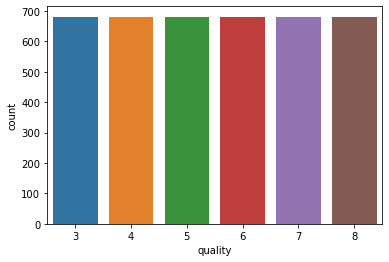

In [33]:
sns.countplot(train_y)

# tuning the model Hyper parmeter using gridsearch

In [34]:
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [35]:
dataset=datasets.load_diabetes()

In [36]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()

In [37]:
grid=GridSearchCV(estimator=model,param_grid=alphavalue)

In [38]:
grid.fit(dataset.data,dataset.target)
print(grid)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [39]:
print(grid.best_score_)

0.4823214545225419


In [40]:
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.0001
{'alpha': 0.0001}


In [41]:
from sklearn .linear_model import LinearRegression,Lasso,Ridge
ds=datasets.load_diabetes()
x=ds.data
y=ds.target
lr=LinearRegression()
lr.fit(x,y)
print('Score',lr.score(x,y))
rd=Ridge(alpha=0.0001)
rd.fit(x,y)
print(rd.coef_)
print('Score',rd.score(x,y))

Score 0.5177484222203499
[  -9.9599668  -239.73847277  519.90790158  324.3246984  -783.36095429
  469.74463276   97.14958563  176.00307904  747.93105798   67.67944396]
Score 0.5177479163759708


In [42]:
from sklearn import svm,datasets
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9800000000000001
linear
{'C': 1, 'kernel': 'linear'}


In [43]:
sv=svm.SVC(kernel='linear',C=1)
sv.fit(iris.data,iris.target)
t=sv.score(iris.data,iris.target)
print(round(t,2))

0.99


In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
iris=datasets.load_iris()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)

In [45]:
gd_sr.fit(iris.data,iris.target)
best_parameters=gd_sr.best_params_

In [46]:
print(best_parameters)
best_result=gd_sr.best_score_

{'criterion': 'gini'}


In [47]:
print(best_result)

0.9666666666666668


In [48]:
print(round(best_result,2))

0.97


In [49]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(iris.data,iris.target)
dtc.score(iris.data,iris.target)

1.0

In [50]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
df=pd.read_csv('iris.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
df=df[['petal length','sepal length']]
df.head()

,petal length,sepal length
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0


In [52]:
model=KMeans(n_clusters=3)
y_model=model.fit_predict(df)
y_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [53]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

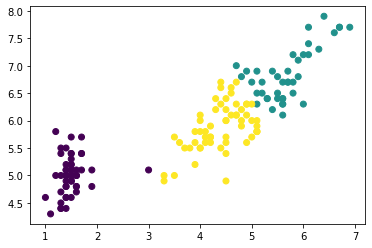

In [54]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=model.labels_,cmap='viridis')

In [55]:
pd.value_counts(y_model)

2    58
0    51
1    41
dtype: int64

In [56]:
df[y_model==0]

,petal length,sepal length
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0
5,1.7,5.4
6,1.4,4.6
7,1.5,5.0
8,1.4,4.4
9,1.5,4.9


In [57]:
df[y_model==1]

,petal length,sepal length
50,4.7,7.0
52,4.9,6.9
76,4.8,6.8
77,5.0,6.7
100,6.0,6.3
102,5.9,7.1
103,5.6,6.3
104,5.8,6.5
105,6.6,7.6
107,6.3,7.3


In [58]:
df[y_model==2]

,petal length,sepal length
51,4.5,6.4
53,4.0,5.5
54,4.6,6.5
55,4.5,5.7
56,4.7,6.3
57,3.3,4.9
58,4.6,6.6
59,3.9,5.2
60,3.5,5.0
61,4.2,5.9


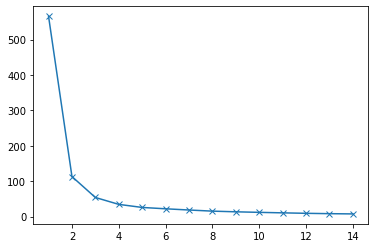

In [59]:
wcss=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df)
    wcss.append(km.inertia_)
plt.plot(K,wcss,marker="x")
#plt.xlabel['k']
#plt.ylabel['Inertia']
#plt.title['Elbow Method']
plt.show()

hiererchial clustering

In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
iris=load_iris()
clustering=AgglomerativeClustering().fit(iris.data)
clustering
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

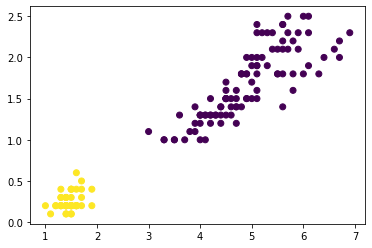

In [61]:
plt.scatter(iris.data[:,2],iris.data[:,3],c=clustering.labels_,cmap='viridis')

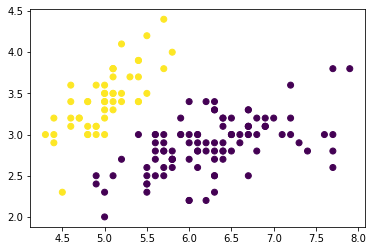

In [62]:
plt.scatter(iris.data[:,0],iris.data[:,1],c=clustering.labels_,cmap='viridis')

DBSCAN density Based scan

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
iris=load_iris()
db=DBSCAN().fit(iris.data)
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [64]:
import pandas as pd
dataset=pd.read_csv('Mall_customers.csv')

In [65]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [66]:
x=dataset.iloc[:,3:]
x.tail(8)

,Annual Income (k$),Spending Score (1-100)
192,113,8
193,113,91
194,120,16
195,120,79
196,126,28
197,126,74
198,137,18
199,137,83


TypeError: 'function' object is not subscriptable

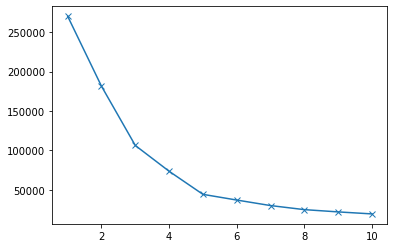

In [67]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker="x")
plt.xlabel['Number of clusters']
plt.ylabel['wcss']
plt.title['Elbow Method']
plt.show()

In [68]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 2 4 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 2 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [69]:
kmeans.labels_

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [70]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [71]:
x[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
123,69,91
125,70,77
127,71,95
129,71,75
131,71,75
133,72,71
135,73,88
137,73,73
139,74,72
141,75,93


In [72]:
x[y_kmeans==2]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
...,...,...
121,67,40
122,69,58
126,71,35
132,72,34


In [73]:
x[y_kmeans==1]

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [74]:
d=pd.DataFrame(data=x[y_kmeans==1])
d

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [75]:
import pickle
d.to_csv('finalkmean.pickle')
filename='finalkmean.pickle'
pickle.dump(kmeans,open(filename,'wb'))

In [76]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [77]:
ds=pd.DataFrame(data=dataset)
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [78]:
ds['group_cluster']=pd.DataFrame(data=kmeans.labels_)

In [79]:
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


In [80]:
ds.to_csv('Mall_customer_clusterfile.csv',index=False)

In [81]:
myds=pd.read_csv('Mall_customer_clusterfile.csv')
myds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,3


In [92]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0]['Annual Income(k$)']),X[y_kmeans==0]['Spending Score(1-100)'],s=100,c='green',label='Cluster']

SyntaxError: cannot assign to function call (Temp/ipykernel_4616/3209715356.py, line 2)